# Introduction to Regression with Neural Network in TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting numerical variable based on some other combination of variables, even shorted...predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating some data to view and fit

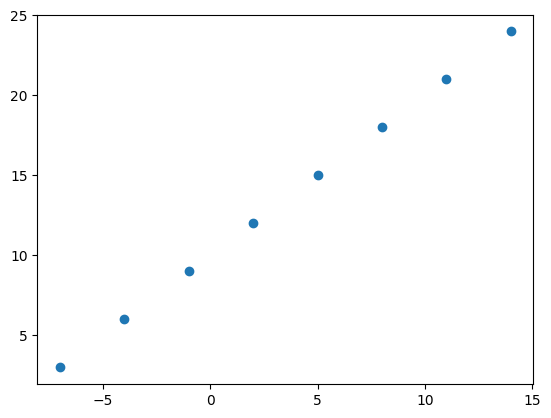

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

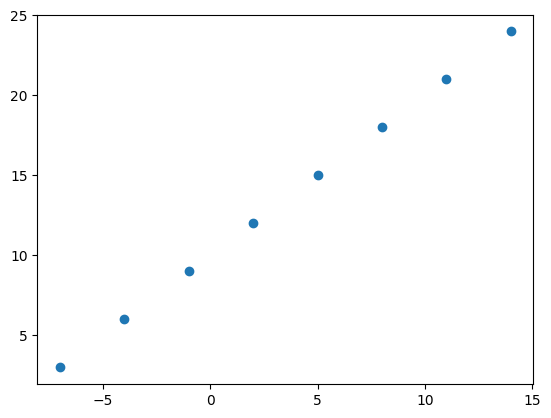

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evalution metric (what we can use to iterpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).


In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # expand X dimension by 1: from one dimension from two dimension

Epoch 1/5
1/1 [==============================] - 1s 982ms/step - loss: 11.6551 - mae: 11.6551
Epoch 2/5
1/1 [==============================] - 0s 32ms/step - loss: 11.5226 - mae: 11.5226
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.3901 - mae: 11.3901
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2576 - mae: 11.2576
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1251 - mae: 11.1251


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 147ms/step


array([[11.985885]], dtype=float32)

In [16]:
y_pred + 16

array([[27.985886]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fittin a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 678ms/step - loss: 11.7341 - mae: 11.7341
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 11.6016 - mae: 11.6016
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 11.4691 - mae: 11.4691
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 11.3366 - mae: 11.3366
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 11.2041 - mae: 11.2041
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0716 - mae: 11.0716
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 10.9391 - mae: 10.9391
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8066 - mae: 10.8066
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6741 - mae: 10.6741
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5416 - mae: 10.5416
Epoch 11/100
1/1 [==============================

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 221ms/step


array([[29.642292]], dtype=float32)

In [20]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 950ms/step - loss: 7.5000 - mae: 7.5000
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 7.4844 - mae: 7.4844
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 7.4688 - mae: 7.4688
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 7.4532 - mae: 7.4532
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 7.4375 - mae: 7.4375
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4219 - mae: 7.4219
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4063 - mae: 7.4063
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 7.3906 - mae: 7.3906
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3749 - mae: 7.3749
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.3592 - mae: 7.3592
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - l

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 409ms/step


array([[31.28876]], dtype=float32)

In [22]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.3647 - mae: 14.3647
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 13.7235 - mae: 13.7235
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 13.0834 - mae: 13.0834
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 12.4428 - mae: 12.4428
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 11.7992 - mae: 11.7992
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1498 - mae: 11.1498
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 10.4914 - mae: 10.4914
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.8208 - mae: 9.8208
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1348 - mae: 9.1348
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 8.4303 - mae: 8.4303
Epoch 11/100
1/1 [==============================] - 0s 17

In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[27.127108]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...


When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize:"
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground thruth?

In [25]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make a labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

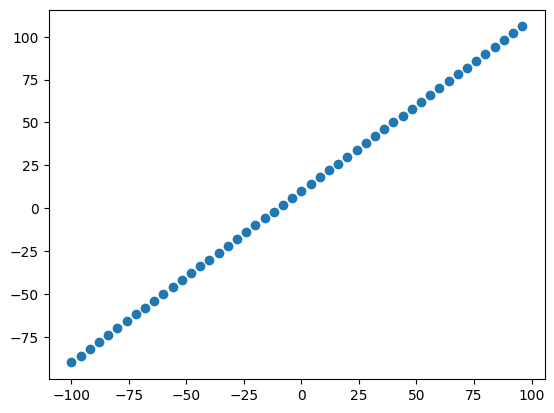

In [27]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [28]:
# Check the length of how many sample we have
len(X)

50

In [29]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

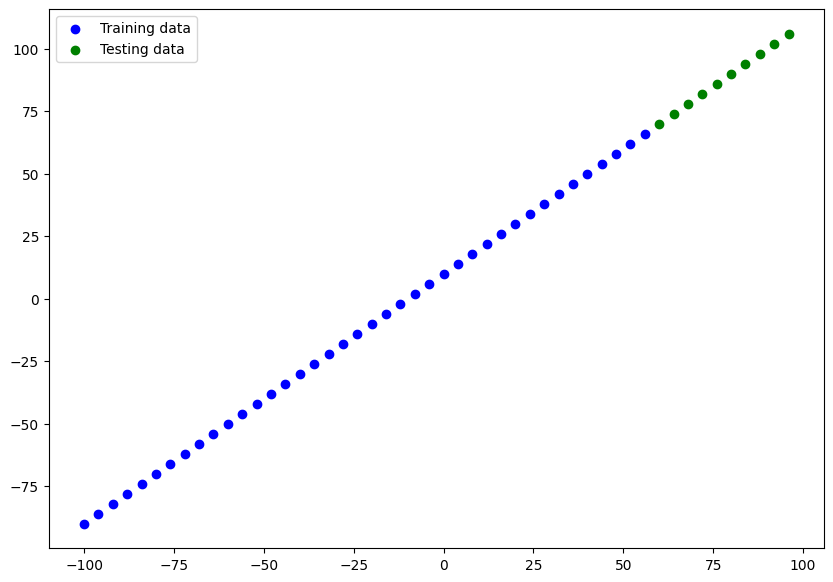

In [30]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [31]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

# Vizualizing the model

In [33]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [34]:
model.build()

ValueError: You must provide an `input_shape` argument.

In [35]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
        tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"]
              )

# 3.Fit the model

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params -  these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from another model during **transfer learning**).

** Resource: ** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to Deep learning.

** Exercice:** Try playing around with the number of hiddden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary()

In [37]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=500, verbose=0)

In [38]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


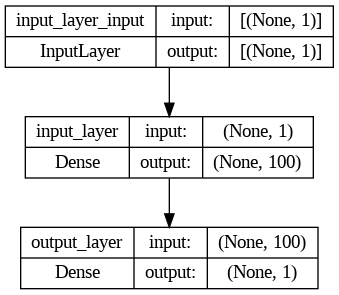

In [39]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Vizualizing our model's prediction

To vizualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's preductions).

In [40]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 70.220406],
       [ 74.234146],
       [ 78.24787 ],
       [ 82.2616  ],
       [ 86.27533 ],
       [ 90.28906 ],
       [ 94.302795],
       [ 98.31652 ],
       [102.33026 ],
       [106.343994]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [42]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


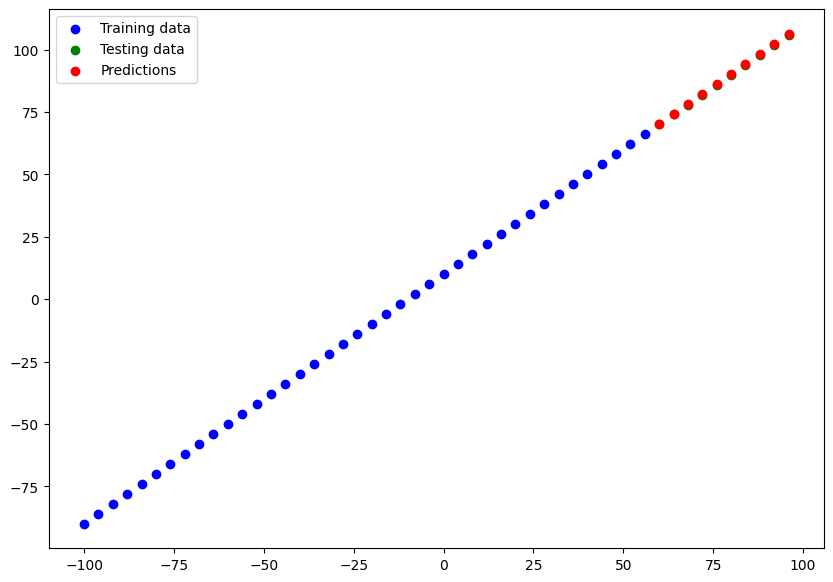

In [43]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [44]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 0.2822 - mae: 0.2822


[0.28219833970069885, 0.28219833970069885]

In [58]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                               y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.823675 , 14.6595125, 12.300852 , 10.747681 , 10.       ,
       10.057813 , 10.921118 , 12.589912 , 15.064209 , 18.343994 ],
      dtype=float32)>

In [59]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.220406],
       [ 74.234146],
       [ 78.24787 ],
       [ 82.2616  ],
       [ 86.27533 ],
       [ 90.28906 ],
       [ 94.302795],
       [ 98.31652 ],
       [102.33026 ],
       [106.343994]], dtype=float32)>

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [61]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.220406,  74.234146,  78.24787 ,  82.2616  ,  86.27533 ,
        90.28906 ,  94.302795,  98.31652 , 102.33026 , 106.343994],
      dtype=float32)>

In [63]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.28219834>

In [67]:
# Calculat ethe mean square error
mse = tf.keras.losses.MSE(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.08119144>

In [91]:
# Make some fundtions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for our model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger ( using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.


Let's do 3 modelling experiements:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [104]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),

])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 9.5920 - mae: 9.5920
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4840 - mae: 9.4840
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0609 - mae: 12.0609
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7451 - mae: 8.7451
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9574 - mae: 10.9574
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1243 - mae: 10.1243
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1498 - mae: 9.1498
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1083 - mae: 9.1083
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.1629 - mae: 15.1629
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.8250 - mae: 7.8250
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss

1/1 [==============================] - 0s 45ms/step


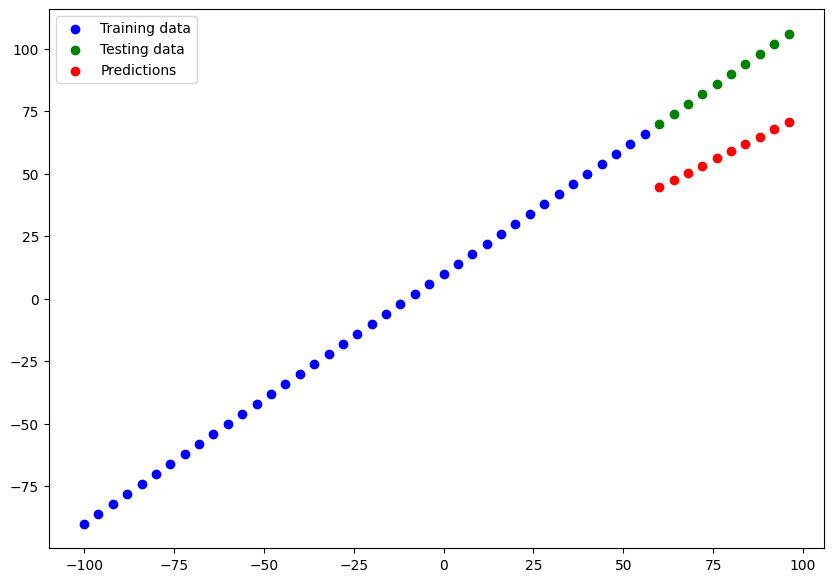

In [105]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [106]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.388428>,
 <tf.Tensor: shape=(), dtype=float32, numpy=933.6834>)

In [78]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [120]:
#set the random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"]
                )

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 39.1766 - mse: 2365.7905
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 18.3678 - mse: 530.6217
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 15.3382 - mse: 322.6179
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 15.4664 - mse: 322.0489
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0887 - mse: 287.8434
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9954 - mse: 174.2482
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.3190 - mse: 155.3714
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1462 - mse: 167.1717
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.2460 - mse: 2700.0339
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.5430 - mse: 1149.9773
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 33ms/step


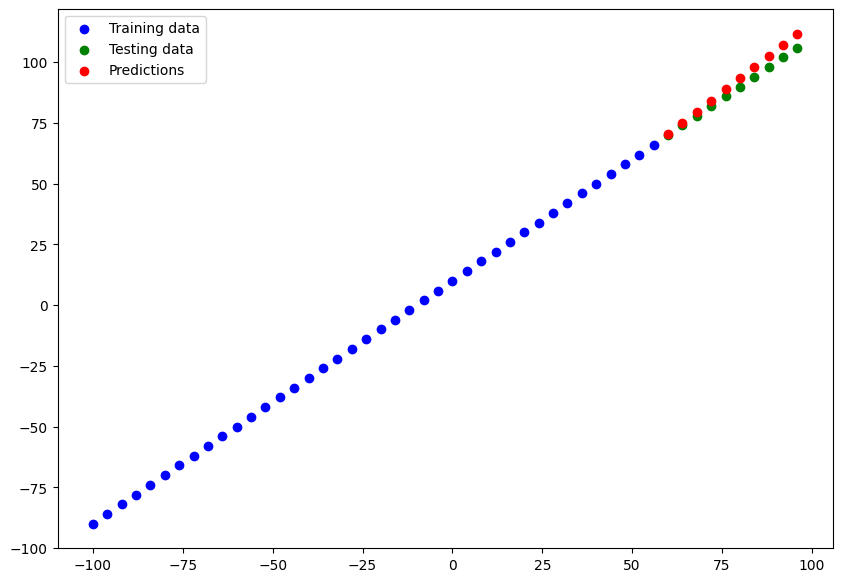

In [122]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [123]:
# Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1006217>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.410212>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [128]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit our model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 54.0829 - mae: 54.0829
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 29.0494 - mae: 29.0494
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 19.9421 - mae: 19.9421
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 12.9221 - mae: 12.9221
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.2286 - mae: 14.2286
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.3862 - mae: 11.3862
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.4200 - mae: 12.4200
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.9771 - mae: 10.9771
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.8603 - mae: 38.8603
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 26.4593 - mae: 26.4593
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 232ms/step


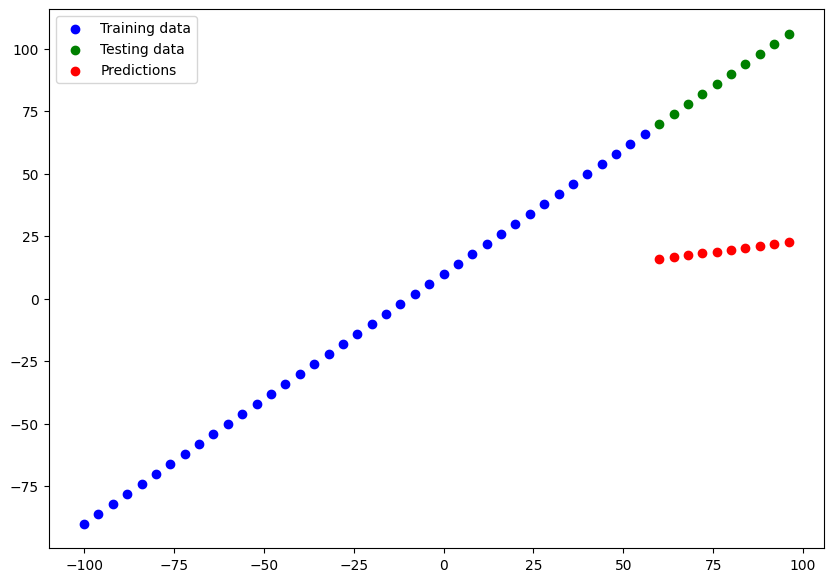

In [129]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [130]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71633>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.415>)

**Note:** You want to start with small experiements (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [135]:
# Let's compare our model's results using pandas DataFrame

import pandas as pd

model_results = [["model_1",mae_1.numpy(), mse_1.numpy()],
                 ["model_2",mae_2.numpy(), mse_2.numpy()],
                 ["model_3",mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.388428,933.683411
1,model_2,3.100622,12.410212
2,model_3,68.716331,4808.415039


Looks like `model_2` performed the best...

In [136]:
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of the main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioners moto:"experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing do, it can be tedious if you're running lots of experiments.else

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiements.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google colab (or wherever they were trained) such as a web application or a mobile app.

There are 2 main format we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [142]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [143]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [145]:
# Save model using the keras format
model_2.save("best_model_keras_format.keras")

In [147]:
# Loading in a saved model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
# Compare model_2 predictions with SavedModel format model predictions

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 70ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [152]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model

In [154]:
# Compare model_2 predictions with h5 format model predictions
loaded_h5_model.predict(X_test) == model_2.predict(X_test)

1/1 [==============================] - 0s 29ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])